In [1]:
%matplotlib inline
from point import Point, PointPattern
import pysal as ps
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

shapefile = ps.open(ps.examples.get_path('new_haven_merged.shp'))
shapefile


In [2]:
dbf = ps.open(ps.examples.get_path('new_haven_merged.dbf'))
dbf

DataTable: /home/qstin/anaconda3/lib/python3.5/site-packages/pysal/examples/newHaven/new_haven_merged.dbf

In [3]:
zipped_pp = PointPattern()

for geometry, attributes in zip(shapefile, dbf):
    zipped_pp.add_point(Point(geometry[0], geometry[1], attributes[1]))


In [4]:
nn = zipped_pp.average_nearest_neighor_KDTree('animal-bites')
print("This average nearest neighbor for animal bites is: {}".format(nn))

This average nearest neighbor for animal bites is: 0.01261354238016035


In [5]:
crit_max, crit_min = PointPattern.get_critical(zipped_pp.generate_realizations())
def is_sig(n):
    if n < crit_min or n > crit_max:
        return "is significant!"
    else:
        return "is not significant."

In [6]:
print("The nearest neighbor of animal bites {}".format(is_sig(nn)))

The nearest neighbor of animal bites is significant!


In [7]:
nn_all = zipped_pp.average_nearest_neighor_KDTree()
print("The neareset neighbor of all data {}".format(is_sig(nn_all)))

The neareset neighbor of all data is significant!


In [8]:
"""Begin assignment 9"""

'Begin assignment 9'

In [25]:
new_array = []
for item in zipped_pp.points:
    new_array.append([item.x, item.y])
nparray = np.array(new_array)

In [26]:
def plot_points(x, y, **kwargs):
    plot(x, y, **kwargs)


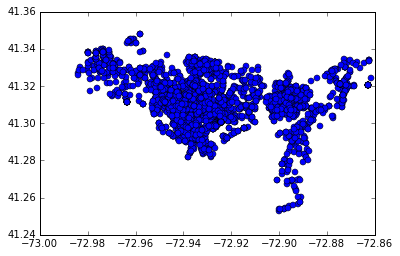

In [32]:
zipped_pp.plot_points = plot_points
zipperita = Point(nparray[:,0], nparray[:,1])

zipped_pp.plot_points(zipperita.x, zipperita.y, marker='o', linewidth=0)